# Trabajo práctico N° 5

## Enunciado

1. Utilizar, al igual que en los anteriores prácticos, una semilla de random_state igual al número de orden en Entregas TPs.

2. Elegir dos clasificadores y realizar alguna predicción en un dataset a su elección tal como lo venimos haciendo hasta ahora, mostrando para cada clasificador la tasa de aciertos junto con sus respectivos precision y recall (ayuda: utilizar *classification\_report* de _sklearn.metrics_ para no tener que calcular ambos a mano). Se alienta a que busquen nuevos datasets y cómo implementar clasificadores, por lo que al menos uno de los clasificadores seleccionados debe haber sido uno de los vistos en esta clase o algún otro no visto anteriormente.

3. Explicar el paso a paso de la implementación, y de la comparación de sus errores. Explicar por qué creen que un clasificador se desempeñó mejor o similarmente que el otro.

Fecha de entrega: **17/05/2017**.

Nota: la resolución de los ejercicios es **individual**; en el caso de que dos ejercicios enviados contengan un código igual o muy similar (sin considerar los comentarios), se los considerará a ambos como desaprobados. La reutilización del código de los notebooks está permitida (por ejemplo para confeccionar gráficos).

## Desarrollo

#### Para este trabajo se eligió un dataset para identificar que sitios web pueden ser phishing y cuales no

#### 1. Se declara la variable random_state con el numero de alumno correspondiente (3)

In [1]:
import numpy as np
semilla = np.random.RandomState(3)

#### 2. En este caso se utilizan 2 clasificadores: KNN y Decision Tree

#### Carga de y preprocesamiento de datos 

Se carga el dataset

In [2]:
import pandas as pd
nombres = ["has_ip", "long_url", "short_service", "has_at", "double_slash_redirect", "pref_suf", "has_sub_domain", "ssl_state", "long_domain", "favicon", "port", "https_token", "req_url", "url_of_anchor", "tag_links", "SFH", "submit_to_email", "abnormal_url", "redirect", "mouseover", "right_click", "popup", "iframe", "domain_Age", "dns_record", "traffic", "page_rank", "google_index", "links_to_page", "stats_report", "target"]
data=pd.read_csv("phising.csv", header=None, names=nombres)
x = np.array(data)
# Eliminamos la columna del resultado (target)
x = np.delete(x, 30, axis=1)
y = np.array(data.target)

Se normalizan los datos

In [3]:
from scipy import stats
x_norm = stats.zscore(x)

Se dividen los datos en train y test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, random_state=semilla)

#### Se procede a instanciar el clasificador KNN

In [5]:
def k_optimo(X_train, y_train, X_test):
    score_optimo = 0
    for k in range(1, len(X_train)):
        clf = neighbors.KNeighborsClassifier(weights='distance', n_neighbors=k)
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        if clf.score(X_test, y_test) > score_optimo:
            k_optimo = k
            score_optimo = clf.score(X_test, y_test)
    return k_optimo

In [6]:
from sklearn import neighbors
k_optimo = k_optimo(X_train, y_train, X_test)
clf = neighbors.KNeighborsClassifier(weights='distance', n_neighbors=k_optimo)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

Predecimos los datos de test y mostramos dicha prediccion

In [7]:
y_hat = clf.predict(X_test)
print('La salida de la prediccion es: \n', y_hat)

La salida de la prediccion es: 
 [ 1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1  1 -1  1  1
 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1
  1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1
 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1
 -1  1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1 -1  1 -1 -1
  1 -1  1  1 -1  1  1 -1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1
 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1
 -1  1  1 -1  1 -1  1 -1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1 -1
 -1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1
  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1
  1 -1  1 -1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 

Primero se muestra la $confussion$ $matrix$ para visualizar mejor los resultados de la predicción

In [8]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_hat, labels=[-1,1])
print(cm)

# Formateamos la confussion matrix
list1 = ["Real no fishing (-1)", "Real fishing (1)"]
list2 = ["Predicho no fishing (-1)", "Predicho fishing (1)"]
pd.DataFrame(cm, list1, list2)

[[315  14]
 [ 15 270]]


,Predicho no fishing (-1),Predicho fishing (1)
Real no fishing (-1),315,14
Real fishing (1),15,270


Mostramos la tasa de aciertos junto con sus respectivos precision y recall

In [9]:
print(metrics.classification_report(y_test, y_hat, target_names=['no phising', 'phising']))

             precision    recall  f1-score   support

 no phising       0.95      0.96      0.96       329
    phising       0.95      0.95      0.95       285

avg / total       0.95      0.95      0.95       614



#### Se procede a instanciar el clasificador Decision tree

In [11]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=semilla)
clf = clf.fit(X_train, y_train)

Predecimos los datos de test y mostramos dicha prediccion

In [12]:
y_hat_tree = clf.predict(X_test)
print('La salida de la prediccion es: \n', y_hat_tree)

La salida de la prediccion es: 
 [ 1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1  1 -1  1  1
 -1 -1 -1  1  1  1  1 -1 -1  1  1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1
  1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1
 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1
 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1
 -1  1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1
  1 -1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1
 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1
 -1  1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1
  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1
  1 -1  1 -1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 

Primero se muestra la $confussion$ $matrix$ para visualizar mejor los resultados de la predicción

In [13]:
cm_tree = metrics.confusion_matrix(y_test, y_hat_tree, labels=[-1,1])
print(cm_tree)
# Formateamos la confussion matrix
list1 = ["Real no fishing (-1)", "Real fishing (1)"]
list2 = ["Predicho no fishing (-1)", "Predicho fishing (1)"]
pd.DataFrame(cm_tree, list1, list2)

[[317  12]
 [ 15 270]]


,Predicho no fishing (-1),Predicho fishing (1)
Real no fishing (-1),317,12
Real fishing (1),15,270


Mostramos la tasa de aciertos junto con sus respectivos precision y recall

In [14]:
print(metrics.classification_report(y_test, y_hat_tree, target_names=['no phising', 'phising']))

             precision    recall  f1-score   support

 no phising       0.95      0.96      0.96       329
    phising       0.96      0.95      0.95       285

avg / total       0.96      0.96      0.96       614



Se adjunta un grafico de la importancia de cada feature para el arbol

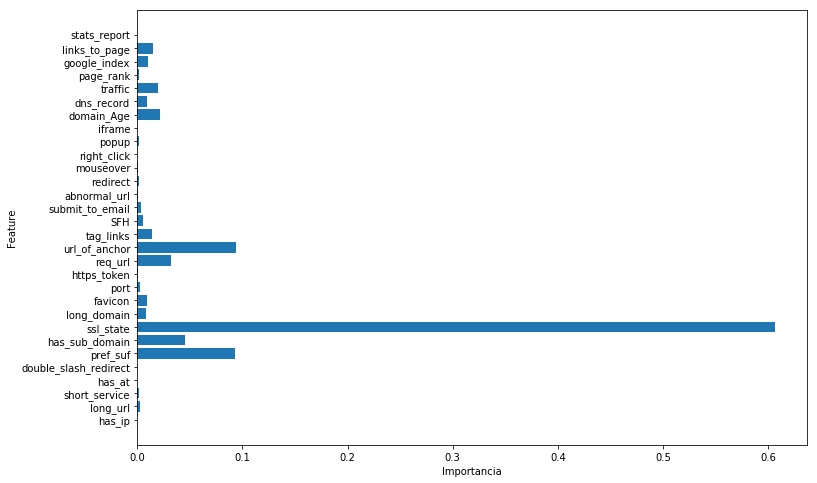

In [15]:
import matplotlib.pyplot as plt
# Sacamos el target de nombres
nombres.pop(30)
nombres = np.array(nombres)
yticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
plt.figure(figsize=(12,8))
plt.yticks(yticks, nombres)
plt.barh(yticks, clf.feature_importances_)
plt.ylabel('Feature')
plt.xlabel('Importancia')
plt.show()

#### 3. Se explica porque el Decision tree tuvo mejor desempeño que el KNN

En este caso no hay demasiada diferencia en la tasa de aciertos de los dos clasificadores. Sin embargo, en mi opinión, Decision tree se adapta un poco mejor al dataset elegido debido a que los valores de las $features$ son discretos y clasificables. Ademas es mas sencillo de interpretar y se puede mostrar informacion como la graficada anteriormente. En el caso de KNN no seria de mucha utilidad utilizar las distancias debido a que los datos son discretos y cercanos entre si.